a) Write a Python program to determine if a given Joint PMF corresponds to independent random variables (X,Y) or not. Take the range of values of random variables X and Y as the input and then take the Joint PMF as the input. Assume X and Y take finite number of values.

In [ ]:
import numpy as np
x = input().split()
# x = [0, 1, 2]
y = input().split()
# y = [0, 1]
joint_pmf=[]
for c in y:
    r = list(map(float,input().split()))
    joint_pmf.append(r)
joint_pmf_matrix = np.array(joint_pmf)
# print(joint_pmf_matrix)
x_marginal = np.sum(joint_pmf_matrix , axis = 0)
# print(x_marginal)
y_marginal = np.sum(joint_pmf_matrix , axis = 1)
# print(y_marginal)
flag1 = True
for i in range(len(y)):
    for j in range(len(x)):
        if x_marginal[j] * y_marginal[i] != joint_pmf_matrix[i][j]:
            flag1 = False
            break
    if not flag1:
        break
if flag1:
    print("The Joint PMF corresponds to independent random variables (X,Y).")
else:
    print("The Joint PMF does not corresponds to independent random variables (X,Y).")


0 1 2
0 1
0.1 0.2 0.3
0.4 0.5 0.6
The Joint PMF does not corresponds to independent random variables (X,Y).


b) Plot the Joint PMF and the corresponding Joint CDF. Also, determine and plot the two Marginal PMFs and Marginal CDFs.


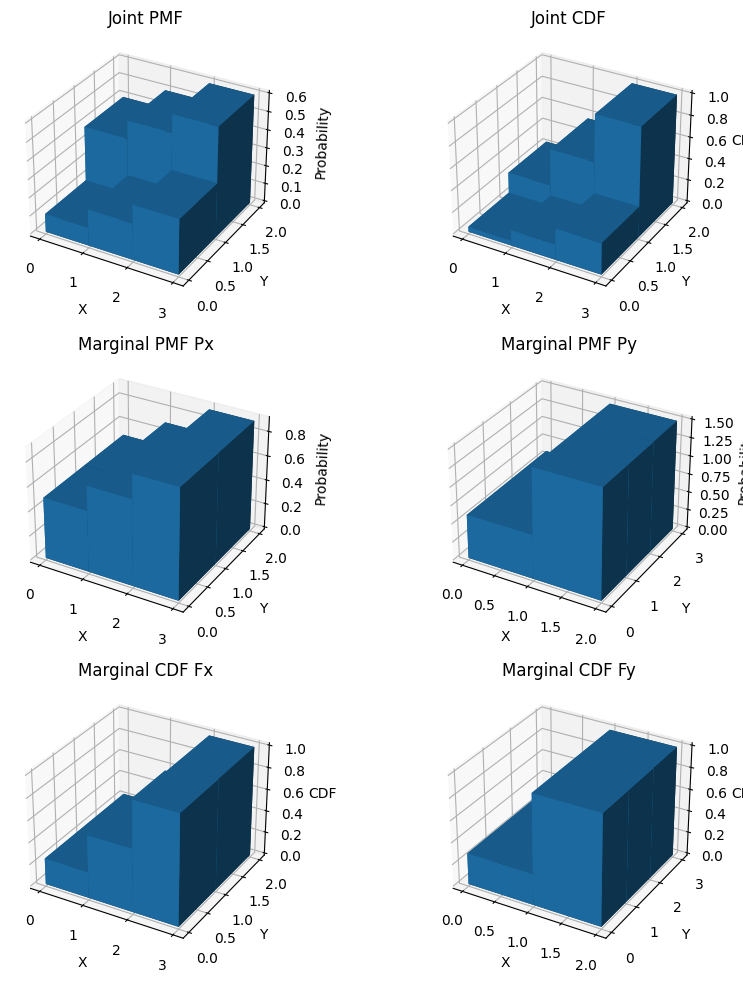

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.arange(joint_pmf.shape[1])
y1 = np.arange(joint_pmf.shape[0])
x_1, y_1 = np.meshgrid(x1, y1)
x1f, y1f = x_1.flatten(), y_1.flatten() # x and y coordinates

x_1_, y_1_ = np.meshgrid(y1, x1)
x1f_, y1f_ = x_1_.flatten(), y_1_.flatten() # x and y coordinates

z1 = joint_pmf.flatten()  # z
joint_cdf_matrix = np.zeros_like(joint_pmf_matrix)

for i in range(joint_pmf_matrix.shape[0]):
    for j in range(joint_pmf_matrix.shape[1]):
        joint_cdf_matrix[i, j] = np.sum(joint_pmf_matrix[0:(i+1) , 0:(j+1)])
z2 = joint_cdf_matrix.flatten()
z2=z2/z2[-1]
o = np.zeros_like(z1) #start
width = depth = 1

#figure
fig = plt.figure(figsize=(10, 12))
ax1 = fig.add_subplot(321, projection='3d')
ax2 = fig.add_subplot(322, projection='3d')
ax3 = fig.add_subplot(323, projection='3d')
ax4 = fig.add_subplot(324, projection='3d')
ax5 = fig.add_subplot(325, projection='3d')
ax6 = fig.add_subplot(326, projection='3d')

z3 = list(x_marginal)*len(y1)
z4 = list(y_marginal)*len(x1)
xmarcd = np.cumsum(x_marginal)
xmarcd = xmarcd/xmarcd[-1]
ymarcd = np.cumsum(y_marginal)
ymarcd = ymarcd/ymarcd[-1]
z5 = list(xmarcd)*len(y1)
z6 = list(ymarcd)*len(x1)
#plotting
ax1.bar3d(x1f, y1f, o, width, depth, z1, shade=True)
ax2.bar3d(x1f, y1f, o, width, depth, z2, shade=True)
ax3.bar3d(x1f, y1f, o, width, depth, z3, shade=True)
ax4.bar3d(x1f_, y1f_, o, width, depth, z4, shade=True)
ax5.bar3d(x1f, y1f, o, width, depth, z5, shade=True)
ax6.bar3d(x1f_, y1f_, o, width, depth, z6, shade=True)


#format
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Probability')
ax1.set_title('Joint PMF')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('CDF')
ax2.set_title('Joint CDF')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Probability')
ax3.set_title('Marginal PMF Px')
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
ax4.set_zlabel('Probability')
ax4.set_title('Marginal PMF Py')
ax5.set_xlabel('X')
ax5.set_ylabel('Y')
ax5.set_zlabel('CDF')
ax5.set_title('Marginal CDF Fx')
ax6.set_xlabel('X')
ax6.set_ylabel('Y')
ax6.set_zlabel('CDF')
ax6.set_title('Marginal CDF Fy')

plt.show()

c) Determine the value of E[XY]. If X1=X-E[X] and Y1=Y-E[Y], determine E[X1Y1].


In [ ]:
sum = 0
x,y = joint_pmf.shape
for i in range(x):
    for j in range(y):
        res = i * j * joint_pmf_matrix[i][j]
        sum+=res
print(f'Expecation E[XY] = {sum}')

xx = 0
yy = 0
for i in range(y):
    xx+=i*list(x_marginal)[i]
for i in range(x):
    yy+=i*list(y_marginal)[i]

print(f'Covariance = Cov(X,Y) = E[XY]-E[X]E[Y] = {sum-xx*yy}')

Expecation E[XY] = 1.7
Covariance = Cov(X,Y) = E[XY]-E[X]E[Y] = -2.05
